In [ ]:
# import dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load in the MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# preprocessing of MNIST data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
# Create a CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=(4,4),strides=(1,1), input_shape=(28,28,1),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(4,4),strides=(1,1), input_shape=(28,28,1),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = "softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2

In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
# preprocess the data and train the model for 10 epochs
x_train = x_train.reshape(-1,28, 28,1)
x_test = x_test.reshape(-1,28, 28, 1)
log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.3)

Epoch 1/10
700/700 [==============================] - 76s 108ms/step - loss: 0.2461 - accuracy: 0.9226 - val_loss: 0.0635 - val_accuracy: 0.9806
Epoch 2/10
700/700 [==============================] - 75s 107ms/step - loss: 0.0830 - accuracy: 0.9743 - val_loss: 0.0442 - val_accuracy: 0.9868
Epoch 3/10
700/700 [==============================] - 75s 108ms/step - loss: 0.0611 - accuracy: 0.9811 - val_loss: 0.0368 - val_accuracy: 0.9889
Epoch 4/10
700/700 [==============================] - 75s 107ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.0382 - val_accuracy: 0.9882
Epoch 5/10
700/700 [==============================] - 75s 107ms/step - loss: 0.0428 - accuracy: 0.9861 - val_loss: 0.0343 - val_accuracy: 0.9894
Epoch 6/10
700/700 [==============================] - 75s 107ms/step - loss: 0.0385 - accuracy: 0.9886 - val_loss: 0.0341 - val_accuracy: 0.9897
Epoch 7/10
700/700 [==============================] - 75s 107ms/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0327 - val_ac

In [ ]:
# save the model into a file
model.save('m.model')
print("Model saved!")

INFO:tensorflow:Assets written to: m.model/assets
Model saved!


In [ ]:
# load in the model
model = tf.keras.models.load_model('m.model')
print(x_test)

I predict this number is a: 7


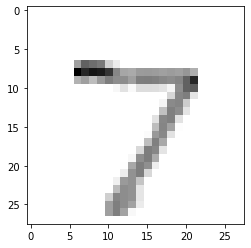

In [ ]:
# Test the model
%matplotlib inline
import matplotlib.pyplot as plt

x_test = tf.keras.utils.normalize(x_test, axis=1) 
image = x_test[:1]
predictions = model.predict(image) 
t = (np.argmax(predictions[0])) 
print("I predict this number is a:", t)
plt.imshow(image[0].reshape(28, 28), cmap=plt.cm.binary)
plt.show()